# Contents
01 Importing Libraries
02 Creating Subset and Cleaning Data
03 Creating Line Chart
04 Decomposing the Data Set
05 Conducting Dickey-Fuller Test
06 Making Data Set Stationary by Differencing
07 Checking Data Set's Autocorrelations

# 01 Importing Libraries

In [1]:
# Installing quandl
%pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'pSaYFabhnijdm7gi3tzn'

In [4]:
# Path
path = r'C:\Users\ckra9\Documents\CareerFoundry\World Happiness Rankings'

In [5]:
# Importing cleaned dataset
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merge_all_years.csv'), index_col = False)

In [6]:
df_happiness.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,158,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,315,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,470,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,626,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [10]:
# Importing the Federal Reserve Economic Data "Gross Domestic Product" variable.

data = quandl.get('FRED/GDP')

In [11]:
data.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


# 02 Creating Subset and Cleaning Data

In [8]:
# Dropping unnamed column
df_happy = df_happiness.drop('Unnamed: 0', axis = 1)

In [9]:
df_happy.head()


,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [12]:
# Reset index to use data as filter 

data_2 = data.reset_index()

In [13]:
data_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [15]:
data_2.shape

(300, 2)

In [14]:
data_sub = data_2.loc[(data_2['Date'] >= '2015-01-01') & (data_2['Date'] < '2019-12-01')]

In [16]:
data_sub.shape

(20, 2)

In [17]:
data_sub.head(20)

,Date,Value
272,2015-01-01,17991.348
273,2015-04-01,18193.707
274,2015-07-01,18306.960
275,2015-10-01,18332.079
276,2016-01-01,18425.306
277,2016-04-01,18611.617
278,2016-07-01,18775.459
279,2016-10-01,18968.041
280,2017-01-01,19153.912
281,2017-04-01,19322.920


In [18]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2015-01-01,17991.348
2015-04-01,18193.707
2015-07-01,18306.960
2015-10-01,18332.079
2016-01-01,18425.306


I chose only to keep the GDP statistics from the years (2015-2019) that correspond with the data available from my country happiness rankings data set.

# 03 Creating Line Chart

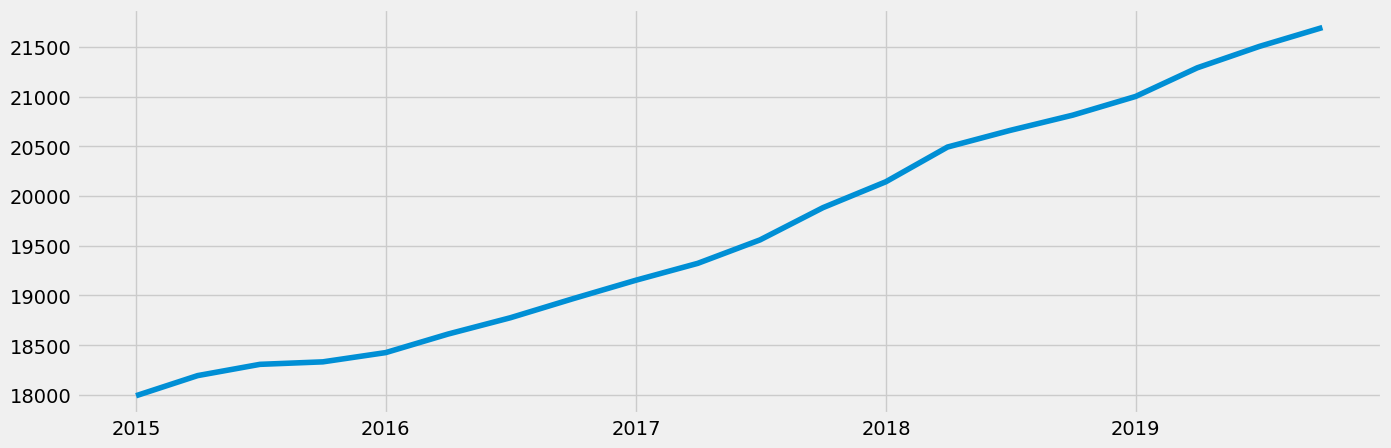

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [20]:
# Checking for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [21]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()


0

# 04 Decomposing the Data Set

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [23]:
# Defining a fixed size for visualizations
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

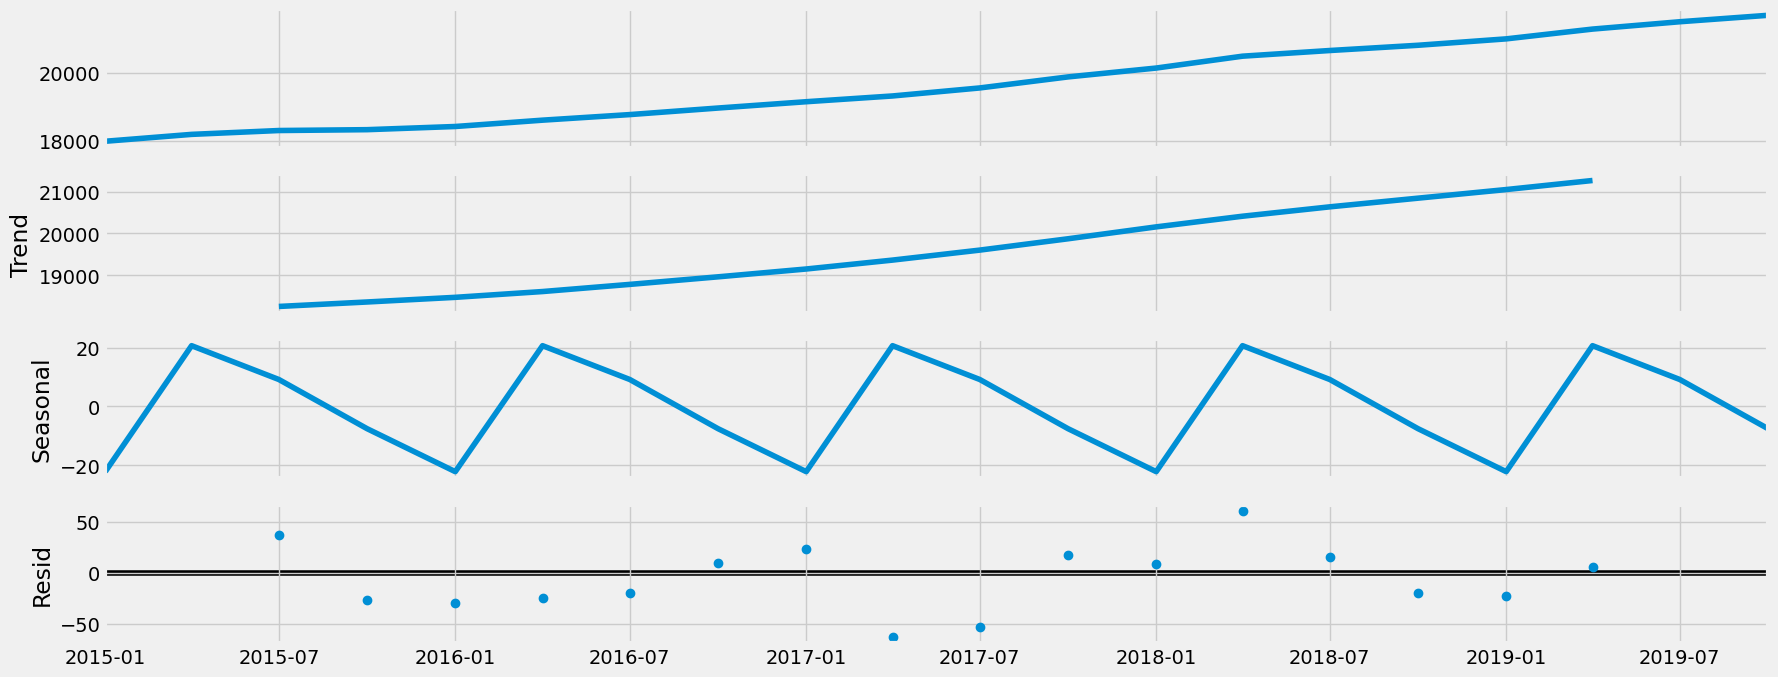

In [24]:
# Plotting the separate components

decomposition.plot()
plt.show()

This shows a clear upward trend in GDP. The level and the trend are very similar, but the level shows a longer amount of time in the data.
The seasonality shows a clear peak in GDP during the first half of the year and a steady drop off towards the end of the year.
The residuals don't seem to follow a specific or obvious pattern

# 05 Conducting Dickey-Fuller Test

In [25]:
# Importing adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Defining the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.492874
p-value                         0.117218
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


Data is non stationary because the test statistic is larger than the critical value. This means that the null hypothesis can't be rejected. 

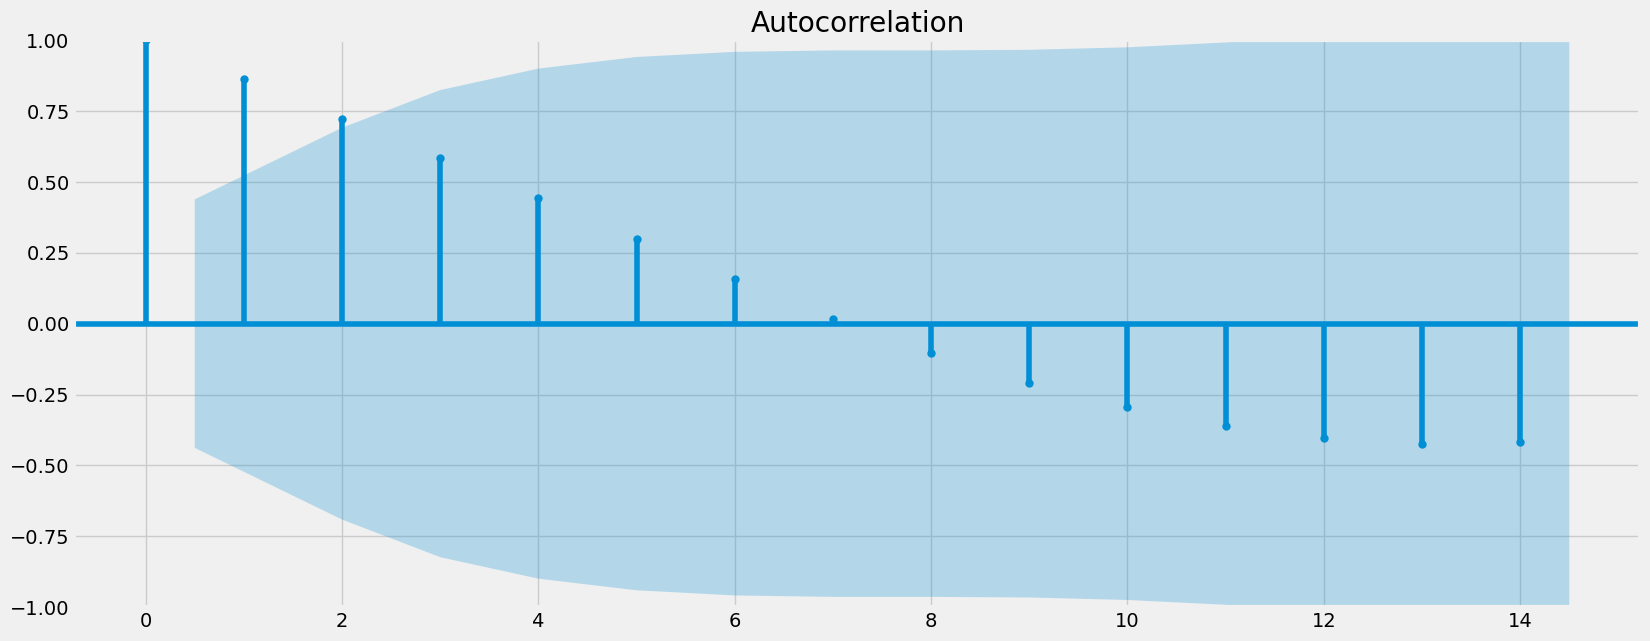

In [26]:
# Further proof using autocorrelations that data set is non-stationary

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

# 06 Making Data Set Stationary by Differencing

In [27]:
# Changing the observation to t-1, making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1) 

In [28]:
# Dropping missing values to use Dickey Fuller test
data_diff.dropna(inplace = True)

In [29]:
data_diff.head()

,Value
datetime,
2015-04-01,202.359
2015-07-01,113.253
2015-10-01,25.119
2016-01-01,93.227
2016-04-01,186.311


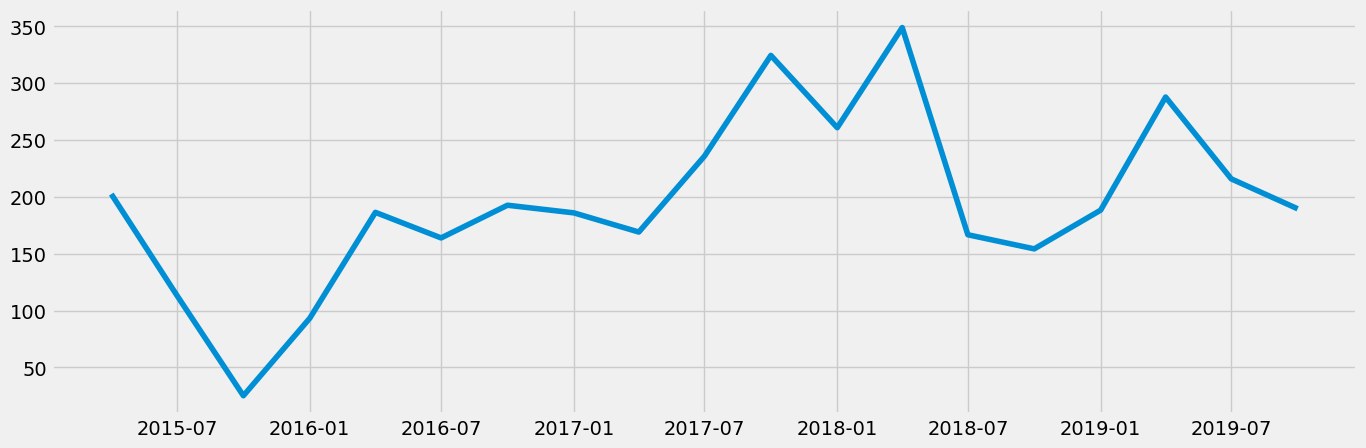

In [30]:
# Plotting the dataset that has been differenced
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
# Performing Dickey Fuller test after differencing
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.300554
p-value                         0.171789
Number of Lags Used             0.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


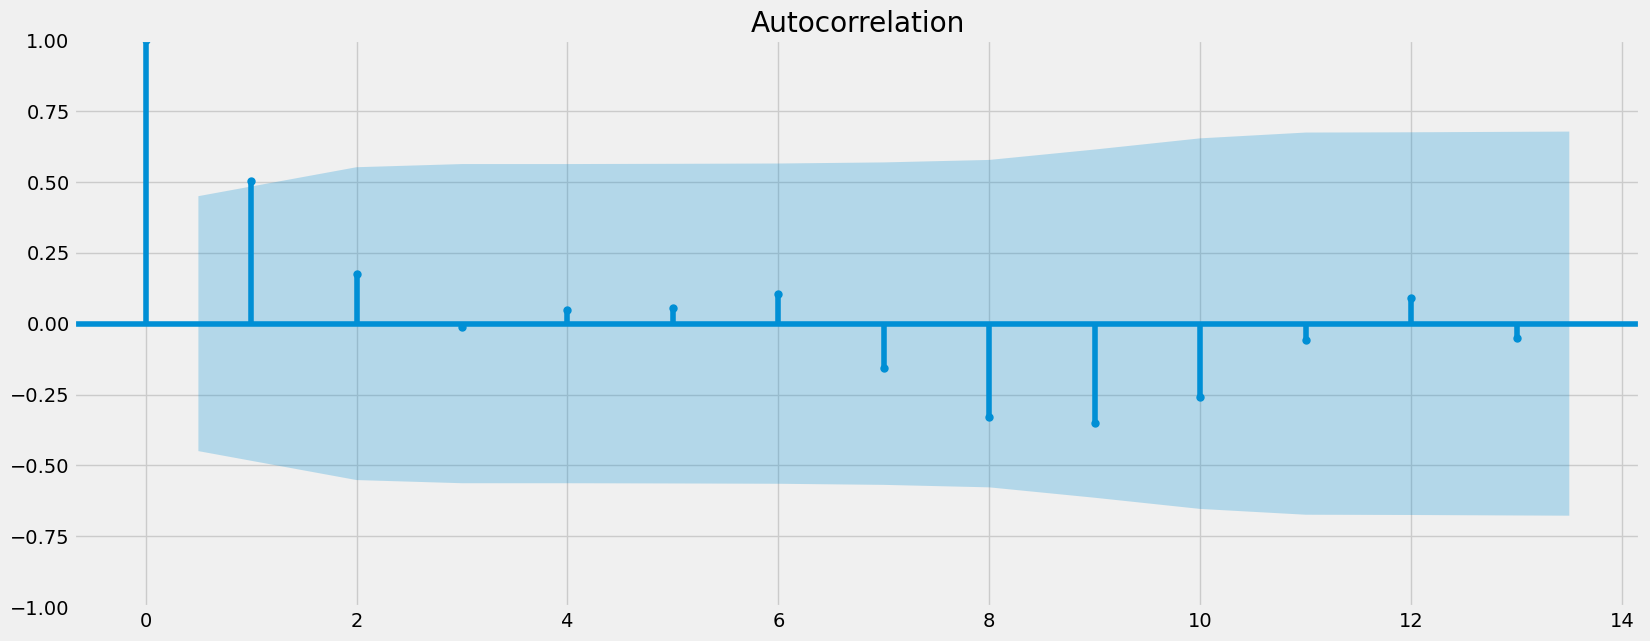

In [32]:
# Plotting Autocorrelations
plot_acf(data_diff)
plt.show()

In [33]:
# Performing another round of differencing
# Test Statistic was still larger than the critical value
data_diff2 = data_diff - data_diff.shift(1) 

In [34]:
# Dropping missing values to use Dickey Fuller test
data_diff2.dropna(inplace = True)

In [35]:
data_diff2.head()

,Value
datetime,
2015-07-01,-89.106
2015-10-01,-88.134
2016-01-01,68.108
2016-04-01,93.084
2016-07-01,-22.469


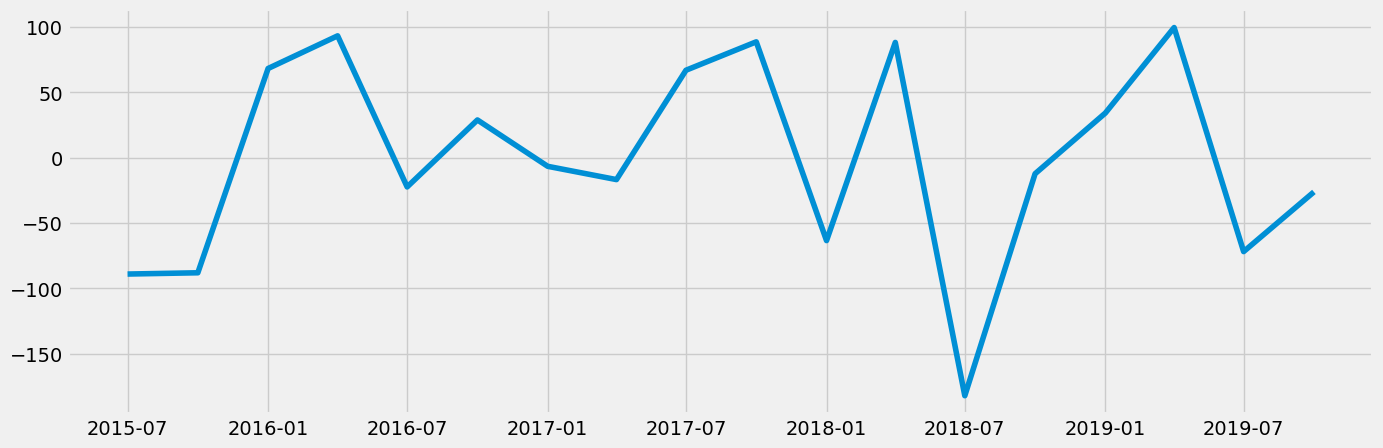

In [36]:
# Plotting the dataset that has been differenced
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [37]:
# Performing Dickey Fuller test after differencing again
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                  1.326793
p-value                         0.996755
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [38]:
# Performing another round of differencing
# Test Statistic was still larger than the critical value
data_diff3 = data_diff2 - data_diff2.shift(1) 

In [39]:
# Dropping missing values to use Dickey Fuller test
data_diff3.dropna(inplace = True)

In [40]:
data_diff3.head()

,Value
datetime,
2015-10-01,0.972
2016-01-01,156.242
2016-04-01,24.976
2016-07-01,-115.553
2016-10-01,51.209


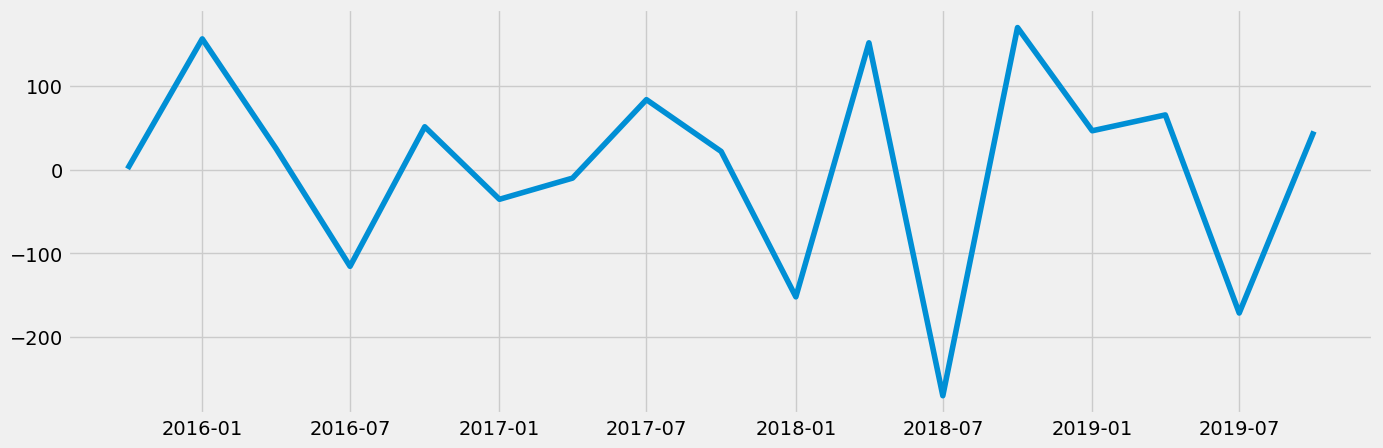

In [41]:
# Plotting the dataset that has been differenced
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff3)

In [42]:
# Performing Dickey Fuller test after differencing again
dickey_fuller(data_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.071598
p-value                         0.001079
Number of Lags Used             4.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


Test Statistic is now smaller than the critical value(1%). This means the null hypothesis may be rejected and the dataset is stationary. 

# 07 Checking Data Set's Autocorrelations

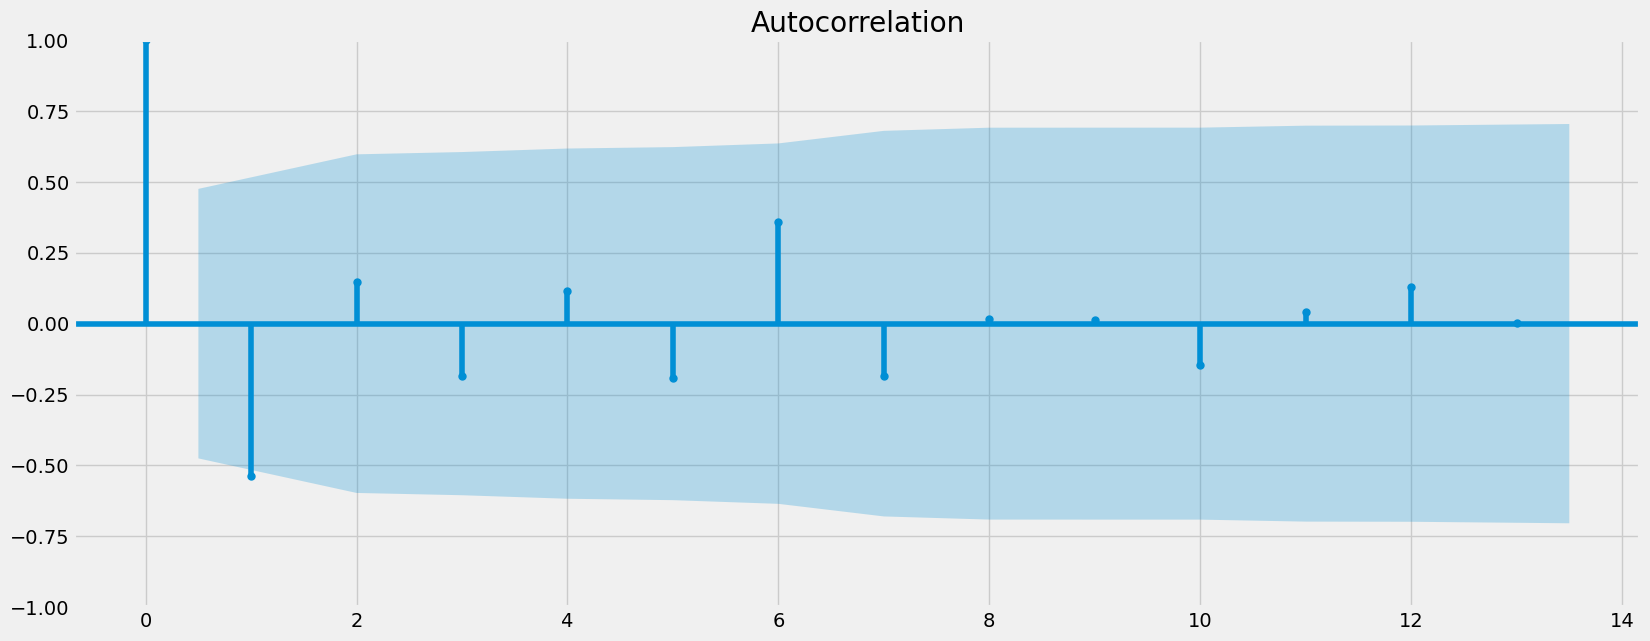

In [43]:
# Plotting Autocorrelations
plot_acf(data_diff3)
plt.show()